In [14]:
import scipy.linalg as lin
import pickle
import numpy as np
import os
from linalg_helpers import compute_powers

import matplotlib.pyplot as plt

## Buggy original ortho systems

In [5]:
with open(f"/data/shared/ICL_Kalman_Experiments/train_and_test_data/ortho/train_ortho_ident_C_state_dim_5_sim_objs.pkl", "rb") as f:
    orig = pickle.load(f)

In [4]:
orig_dets = []
orig_powers_of_A = []
context = 250
for sim_obj in orig:
    power_dets = []
    orig_dets.append(lin.det(sim_obj.A))
    powers_of_A = compute_powers(sim_obj.A, context)

    for i in range(len(powers_of_A)):
        power_dets.append(lin.det(powers_of_A[i]))
    orig_powers_of_A.append(power_dets)

print(f"len of orig_dets: {len(orig_dets)}")


KeyboardInterrupt: 

## ortho haar systems

In [6]:
with open(f"/data/shared/ICL_Kalman_Experiments/train_and_test_data/ortho_haar/train_ortho_haar_ident_C_state_dim_5_sim_objs.pkl", "rb") as f:
    haar = pickle.load(f)

In [11]:
haar_dets = []
haar_powers_of_A = []
for sim_obj in haar:
    power_dets = []
    
    haar_dets.append(lin.det(sim_obj.A))
    powers_of_A = compute_powers(sim_obj.A, context)
    for i in range(len(powers_of_A)):
        power_dets.append(lin.det(powers_of_A[i]))
    haar_powers_of_A.append(power_dets)
print(f"len of haar_dets: {len(haar_dets)}")

len of haar_dets: 40000


## Plot histograms

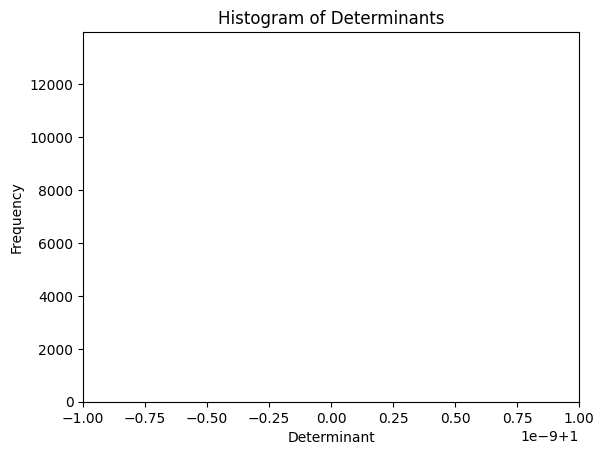

orig_dets: [np.float64(1.0000000000000004), np.float64(0.9999999999999996), np.float64(0.9999999999999999), np.float64(1.0), np.float64(0.9999999999999989), np.float64(1.0), np.float64(0.9999999999999997), np.float64(1.0000000000000004), np.float64(0.9999999999999999), np.float64(1.0000000000000007), np.float64(1.0), np.float64(1.0000000000000009), np.float64(1.0000000000000004), np.float64(0.9999999999999999), np.float64(1.0000000000000002), np.float64(0.9999999999999997), np.float64(0.9999999999999996), np.float64(1.0000000000000002), np.float64(1.0000000000000007), np.float64(1.0), np.float64(0.9999999999999998), np.float64(0.9999999999999996), np.float64(1.0000000000000002), np.float64(1.0000000000000007), np.float64(0.9999999999999998), np.float64(0.9999999999999998), np.float64(0.9999999999999994), np.float64(1.0), np.float64(0.9999999999999996), np.float64(0.9999999999999998), np.float64(1.0), np.float64(0.9999999999999999), np.float64(1.0000000000000002), np.float64(1.0), np.fl

In [ ]:
#plot histogram of determinants
n_bins = 10
plt.hist(orig_dets, n_bins, alpha=1)
plt.xlabel('Determinant')
plt.ylabel('Frequency')
plt.title('Histogram of Determinants')
plt.xlim(0.999999999, 1.000000001)
plt.show()
print(f"orig_dets: {orig_dets}")


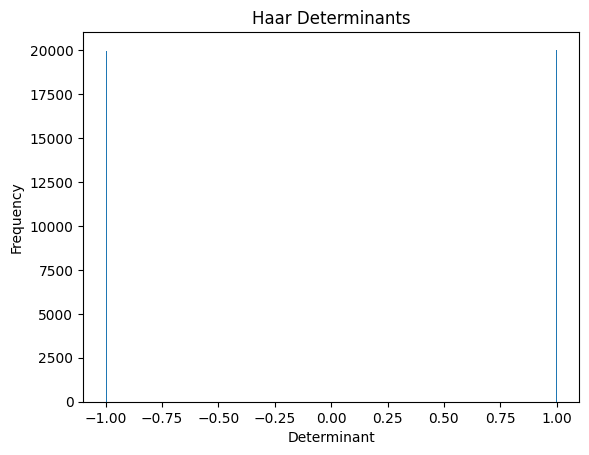

In [28]:
plt.hist(haar_dets, 500, alpha=1, label='haar')
plt.xlabel('Determinant')
plt.ylabel('Frequency')
plt.title('Haar Determinants')
plt.show()

In [20]:

print(f"mean of haar_dets: {np.mean(haar_dets)}")
print(f"haar_dets: {haar_dets}")

mean of haar_dets: 0.0013000000000000036
haar_dets: [np.float64(0.9999999999999998), np.float64(0.9999999999999993), np.float64(-1.0000000000000002), np.float64(-1.0000000000000002), np.float64(1.0), np.float64(1.0), np.float64(1.0000000000000002), np.float64(-0.9999999999999999), np.float64(1.0), np.float64(0.9999999999999997), np.float64(-1.0000000000000002), np.float64(0.9999999999999994), np.float64(0.9999999999999997), np.float64(1.0000000000000002), np.float64(-1.0000000000000002), np.float64(-0.9999999999999998), np.float64(-1.0000000000000004), np.float64(-1.0000000000000002), np.float64(1.0), np.float64(1.0000000000000004), np.float64(1.0000000000000002), np.float64(-0.9999999999999998), np.float64(0.9999999999999996), np.float64(-1.0000000000000002), np.float64(-0.9999999999999996), np.float64(-1.0000000000000004), np.float64(0.9999999999999998), np.float64(-0.9999999999999998), np.float64(-0.9999999999999999), np.float64(-0.9999999999999992), np.float64(-1.0000000000000002),

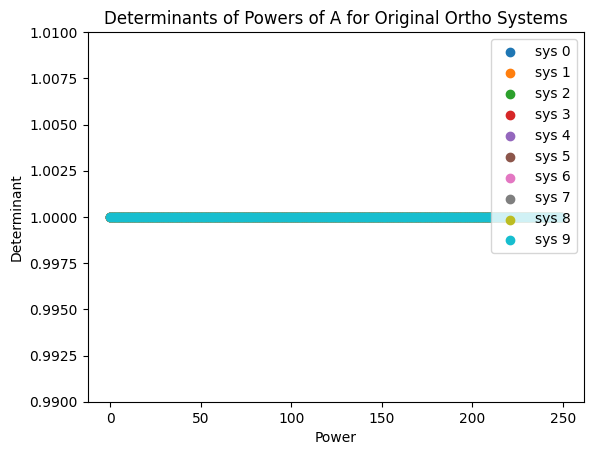

In [22]:
# plot determinants of powers of A
for i in range(10):
    plt.scatter(range(len(orig_powers_of_A[i])), orig_powers_of_A[i], label=f'sys {i}')

plt.xlabel('Power')
plt.ylabel('Determinant')
plt.title('Determinants of Powers of A for Original Ortho Systems')
plt.ylim(0.99, 1.01)
plt.legend()
plt.show()


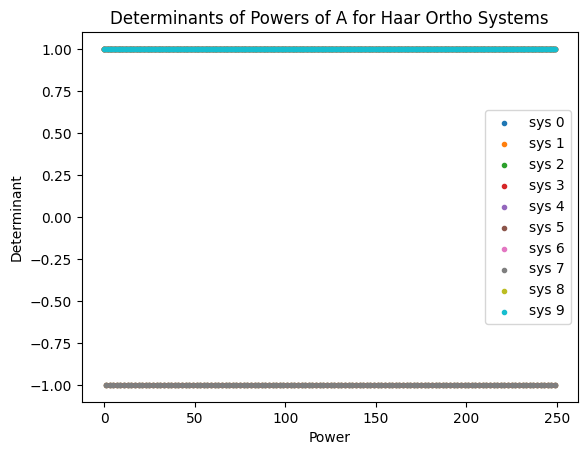

In [23]:
for i in range(10):
    plt.scatter(range(len(haar_powers_of_A[i])), haar_powers_of_A[i], label=f'sys {i}', marker='.')
plt.xlabel('Power')
plt.ylabel('Determinant')
plt.title('Determinants of Powers of A for Haar Ortho Systems')
plt.legend()
plt.show()

## Investigating matrix vector products


In [ ]:
context = 250
norm_ys = []
y = np.random.randn(5)/np.sqrt(5)
norm2y = np.linalg.norm(y)**2
print(f"shape of y: {y.shape}")
print(f"y: {y}")
print(f"norm2y: {norm2y}")
for sim_obj in haar:
    norm_y = [norm2y]
    yi = y
    for i in range(context):
        norm_y.append(np.linalg.norm(yi)**2)
        yi = sim_obj.A @ yi
    norm_ys.append(norm_y)
    

shape of y: (5,)
y: [-0.25378382 -0.62389671  0.46511467 -0.27599995 -0.72648904]
norm2y: 1.2739472739460782


norm_ys[0]:  [np.float64(1.2739472739460782), np.float64(1.2739472739460778), np.float64(1.2739472739460778), np.float64(1.2739472739460778), np.float64(1.2739472739460778), np.float64(1.2739472739460778), np.float64(1.2739472739460778), np.float64(1.2739472739460778), np.float64(1.2739472739460778), np.float64(1.2739472739460778), np.float64(1.2739472739460778), np.float64(1.2739472739460778), np.float64(1.2739472739460778), np.float64(1.2739472739460778), np.float64(1.2739472739460778), np.float64(1.2739472739460778), np.float64(1.2739472739460778), np.float64(1.2739472739460778), np.float64(1.2739472739460778), np.float64(1.2739472739460778), np.float64(1.2739472739460778), np.float64(1.2739472739460778), np.float64(1.2739472739460778), np.float64(1.2739472739460778), np.float64(1.2739472739460778), np.float64(1.2739472739460778), np.float64(1.2739472739460778), np.float64(1.2739472739460778), np.float64(1.2739472739460778), np.float64(1.2739472739460778), np.float64(1.2739472739460

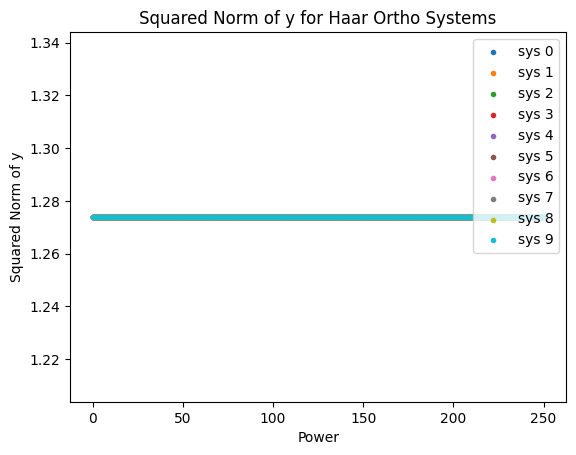

In [16]:
print("norm_ys[0]: ", norm_ys[0])
for i in range(10):
    plt.scatter(range(len(norm_ys[i])), norm_ys[i], label=f'sys {i}', marker='.')
plt.xlabel('Power')
plt.ylabel('Squared Norm of y')
plt.title('Squared Norm of y for Haar Ortho Systems')
plt.legend()
plt.show()